In [3]:
import numpy as np
import h5py

def depth_to_pointcloud(depth, fx, fy, cx, cy):
    # Given intrinsics fx, fy, cx, cy
    rows, cols = depth.shape
    c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
    z = depth
    x = (c - cx) * z / fx
    y = (r - cy) * z / fy
    return np.column_stack((x.ravel(), y.ravel(), z.ravel()))

In [6]:
# Load the .mat file
with h5py.File(r"C:\Users\hojun\git\data\nyu_depth_data_labeled.mat", 'r') as file:
    depths = np.array(file['depths'])

point_cloud = depth_to_pointcloud(np.transpose(depths[:,:,0], (1, 0)), fx=525.0, fy=525.0, cx=319.5, cy=239.5)
np.savetxt('output.xyz', point_cloud, delimiter=' ')


In [8]:
# Load the .mat file
with h5py.File(r"C:\Users\hojun\git\data\nyu_depth_v2_labeled.mat", 'r') as file:
    depths = np.array(file['depths'])
    print(depths.shape)

(1449, 640, 480)


In [59]:
# Import necessary libraries
import numpy as np
import h5py

def depth_to_pointcloud_with_rgb(depth, rgb, fx=525.0, fy=525.0, cx=319.5, cy=239.5):
    """
    Convert a depth image and its corresponding RGB image to a 3D point cloud with RGB values.
    
    Parameters:
    - depth: 2D array representing the depth image.
    - rgb: 3D array representing the RGB image. Shape is (height, width, 3).
    - fx, fy: Focal lengths in pixels.
    - cx, cy: Principal point coordinates (center of the image).
    
    Returns:
    - A 2D array where each row represents a 3D point with its RGB value (x, y, z, r, g, b).
    """
    
    # Convert depth image to 3D point cloud
    rows, cols = depth.shape
    c, r = np.meshgrid(np.arange(cols), np.arange(rows), sparse=True)
    z = depth
    x = (c - cx) * z / fx
    y = (r - cy) * z / fy
    
    # Flatten the RGB values and stack with 3D coordinates
    colors = rgb.reshape(-1, 3)
    return np.column_stack((x.ravel(), y.ravel(), z.ravel(), colors))


In [60]:
# Load the .mat file
with h5py.File(r"C:\Users\hojun\git\data\nyu_depth_v2_labeled.mat", 'r') as file:
    depths = np.array(file['depths'])
    # Assuming the RGB data is stored under a key named 'images' in the .mat file
    rgbs = np.array(file['images'])

In [47]:
rgbs.shape

(1449, 3, 640, 480)

In [56]:
depths[:,:,0]

array([[2.7520132, 2.7520695, 2.7522106, ..., 2.2429442, 2.2428577,
        2.2428234],
       [1.8842598, 1.884209 , 1.8840817, ..., 1.3777062, 1.3775196,
        1.3774453],
       [2.1487446, 2.1487694, 2.1488318, ..., 1.5782344, 1.5781772,
        1.5781543],
       ...,
       [3.865454 , 3.8657048, 3.8663347, ..., 3.804074 , 3.804931 ,
        3.805272 ],
       [5.5939937, 5.5942893, 5.595031 , ..., 4.4176435, 4.4166446,
        4.416247 ],
       [4.9225936, 4.922772 , 4.9232187, ..., 3.2332726, 3.233104 ,
        3.2330368]], dtype=float32)

In [54]:
depths[0]

array([[2.7520132, 2.7519572, 2.7518182, ..., 2.1980946, 2.1979604,
        2.1979067],
       [2.7520695, 2.752013 , 2.7518725, ..., 2.1980414, 2.1979067,
        2.1978528],
       [2.7522106, 2.7521532, 2.7520094, ..., 2.1979074, 2.197772 ,
        2.1977184],
       ...,
       [2.2429442, 2.242909 , 2.2428207, ..., 2.0813298, 2.0816352,
        2.0817583],
       [2.2428577, 2.2428231, 2.242737 , ..., 2.0810537, 2.0813453,
        2.081463 ],
       [2.2428234, 2.242789 , 2.242704 , ..., 2.080945 , 2.0812306,
        2.0813463]], dtype=float32)

In [48]:
depths.shape

(1449, 640, 480)

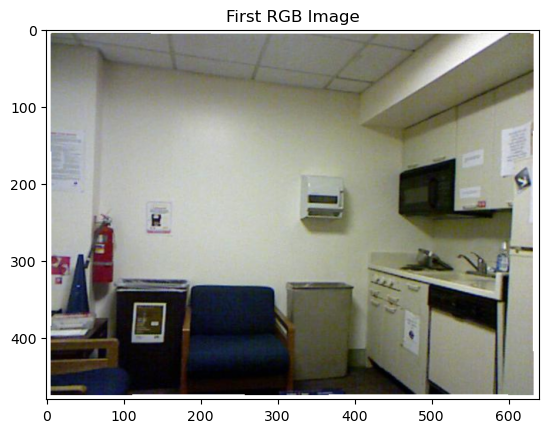

In [34]:
with h5py.File(r"C:\Users\hojun\git\data\nyu_depth_v2_labeled.mat", 'r') as file:
    rgbs = np.array(file['images'])

# For the first image
rgb_image_1 = np.transpose(rgbs[0], (2, 1, 0))

# If you want to visualize it using matplotlib
import matplotlib.pyplot as plt
plt.imshow(rgb_image_1)
plt.title('First RGB Image')
plt.show()


In [44]:
tmp = rgb_image_1[100][100]

In [57]:
depth_image = np.transpose(depths[0,:,:], (1, 0))
rgb_image = np.transpose(rgbs[0,:,:,:], (2, 1, 0))  # Transposing to have shape (width, height, 3)

point_cloud_rgb = depth_to_pointcloud_with_rgb(depth_image, rgb_image)

# Save to .csv format
np.savetxt(f'../data/nyu_depth_v2_labeled_csv/output_{2}.csv', point_cloud_rgb, delimiter=',', header='x,y,z,r,g,b', comments='', fmt='%f,%f,%f,%d,%d,%d')

In [58]:
depth_image.shape

(480, 640)

In [61]:
depths.shape

(1449, 640, 480)

In [62]:
for i in range(depths.shape[0]):
    depth_image = np.transpose(depths[i,:,:], (1, 0))
    rgb_image = np.transpose(rgbs[i,:,:,:], (2, 1, 0))  # Transposing to have shape (width, height, 3)
    
    point_cloud_rgb = depth_to_pointcloud_with_rgb(depth_image, rgb_image)
    
    # Save to .csv format
    np.savetxt(f'../data/nyu_depth_v2_labeled_csv/nyu_depth_v2_labeled_{i}.csv', point_cloud_rgb, delimiter=',', header='x,y,z,r,g,b', comments='', fmt='%f,%f,%f,%d,%d,%d')